In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from PIL import Image

Grayscale - thresholding

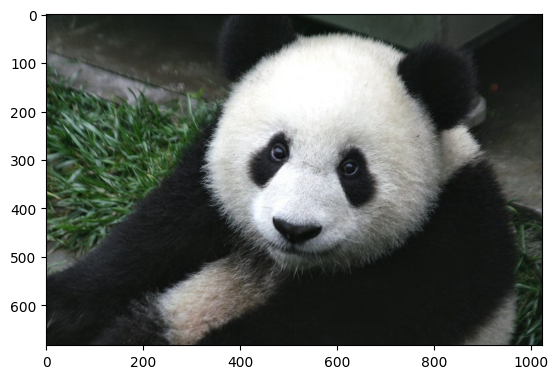

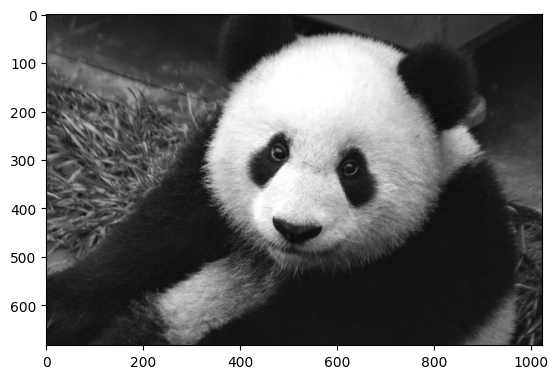

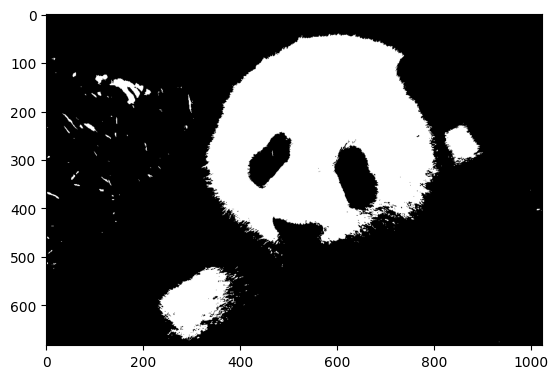

In [4]:
def THRESHOLD(img):
    h = img.shape[0]
    w = img.shape[1]
    TH = 127
    img_out = img_out = np.full((h,w,3),0,dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if img[i][j][0] > TH: 
                img_out[i][j][0] = img_out[i][j][1] = img_out[i][j][2] = 255
            else:
                img_out[i][j][0] = img_out[i][j][1] = img_out[i][j][2] = 0
    return img_out

def Grayscale(img):
    h = img.shape[0]
    w = img.shape[1]
    img_out = img_out = np.full((h,w,3),0,dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            img_out[i][j][0] = img_out[i][j][1] = img_out[i][j][2] = img[i][j][1]
    return img_out


bgr = cv2.imread("image/panda.jpg") #ภาพBGR
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
img_gray = Grayscale(rgb)
img_th = THRESHOLD(rgb)

plt.figure()
plt.imshow(rgb)
plt.figure()
plt.imshow(img_gray)
plt.figure()
plt.imshow(img_th)
plt.show()

Labeling

จำนวนวัตถุ = 8


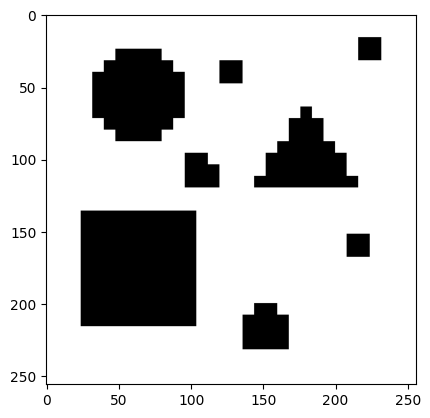

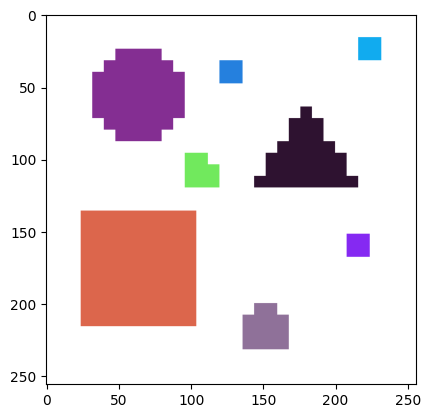

In [5]:

def labeling(img):
    def recursive(x, y, color): # 4
        if 0 <= x < len(img) and 0 <= y < len(img[0]) and img[x][y][0] == 0: 
            img[x][y][0] = color[0]
            img[x][y][1] = color[1]
            img[x][y][2] = color[2]
            recursive(x + 1, y, color)  # ขวา 
            recursive(x - 1, y, color)  # ซ้าย
            recursive(x, y + 1, color)  # บน
            recursive(x, y - 1, color)  # ล่าง
            # recursive(x + 1, y+1, label) # ขวาบน
            # recursive(x - 1, y+1, label)  # ซ้ายบน
            # recursive(x + 1, y - 1, label) # ขวาล่าง
            # recursive(x - 1, y - 1, label) # ซ้ายล่าง
    h = img.shape[0]
    w = img.shape[1]
    counting = 0

    for i in range(h):
        for j in range(w):
            if img[i][j][0] == 0 and img[i][j][1] == 0 and img[i][j][2] == 0:
                r = int(np.random.uniform(1,255))
                g = int(np.random.uniform(1,255))
                b = int(np.random.uniform(1,255))
                color = [r,g,b]
                recursive(i, j,color)
                counting = counting + 1
    print(f"จำนวนวัตถุ = {counting}")

            

bgr = cv2.imread("image/05.png") #ภาพBGR
imgcopy = bgr.copy()
sys.setrecursionlimit(70000)
labeling(imgcopy)


plt.figure()
plt.imshow(bgr)
plt.show()
plt.figure()
plt.imshow(imgcopy)
plt.show()


Find max 3 area objects

จำนวนวัตถุ = 4
[{'Size': 229, 'X_min': 4, 'X_max': 21, 'Y_min': 8, 'Y_max': 27}, {'Size': 100, 'X_min': 14, 'X_max': 26, 'Y_min': 6, 'Y_max': 18}, {'Size': 57, 'X_min': 21, 'X_max': 29, 'Y_min': 19, 'Y_max': 29}, {'Size': 54, 'X_min': 1, 'X_max': 11, 'Y_min': 2, 'Y_max': 9}]
Max 3 area object No.1 = 229 No.3 = 100 No.3 = 57


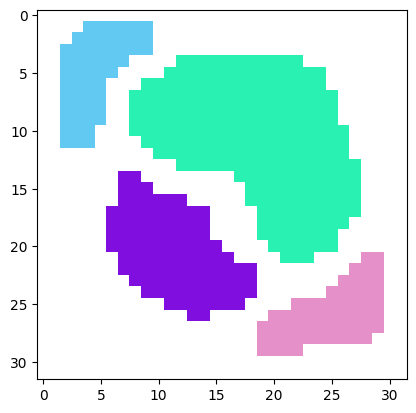

In [6]:
# def recursive(x, y, color,img): # 4
#     if 0 <= x < len(img) and 0 <= y < len(img[0]) and img[x][y][0] == 0:  
#         if x < xmin:
#             xmin = x
#         if x > xmax:
#             xmax = x
#         if y < ymin:
#             ymin = y
#         if y > ymax:
#             ymax = y
#         img[x][y][0] = color[0]
#         img[x][y][1] = color[1]
#         img[x][y][2] = color[2]
#         size = size + 1
#         recursive(x + 1, y, color,img)  # ขวา 
#         recursive(x - 1, y, color,img)  # ซ้าย
#         recursive(x, y + 1, color,img)  # บน
#         recursive(x, y - 1, color,img)  # ล่า
#     print(f"size = {size} xmin = {xmin} xmax = {xmax} ymin = {ymin} ymax = {ymax}")

def labeling_findmax(img):
    def recursive(x, y, color,xmin,xmax,ymin,ymax,size): 
        if 0 <= x < len(img) and 0 <= y < len(img[0]) and img[x][y][0] == 0: 
            if x <= xmin:
                xmin = x
            if x >= xmax:
                xmax = x
            if y <= ymin:
                ymin = y
            if y >= ymax:
                ymax = y
            size = size + 1
            img[x][y][0] = color[0]
            img[x][y][1] = color[1]
            img[x][y][2] = color[2]
            xmin, xmax, ymin, ymax, size = recursive(x + 1, y, color, xmin, xmax, ymin, ymax, size)  # ขวา 
            xmin, xmax, ymin, ymax, size = recursive(x - 1, y, color, xmin, xmax, ymin, ymax, size)  # ซ้าย
            xmin, xmax, ymin, ymax, size = recursive(x, y + 1, color, xmin, xmax, ymin, ymax, size)  # บน
            xmin, xmax, ymin, ymax, size = recursive(x, y - 1, color, xmin, xmax, ymin, ymax, size)  # ล่าง
        return xmin,xmax,ymin,ymax,size
            
    
    h = img.shape[0]
    w = img.shape[1]
    counting = 0
    xmax  = ymax = size = 0
    xmin = h
    ymin = w
    for i in range(h):
        for j in range(w):
            if img[i][j][0] != 0 and img[i][j][0] != 255:
                    xmax  = ymax = size = 0
                    xmin = h
                    ymin = w
            if img[i][j][0] == 0 and img[i][j][1] == 0 and img[i][j][2] == 0:
                r = int(np.random.uniform(1,255))
                g = int(np.random.uniform(1,255))
                b = int(np.random.uniform(1,255))
                color = [r,g,b]
                xmin,xmax,ymin,ymax,size = recursive(i, j,color,xmin,xmax,ymin,ymax,size)
                counting = counting + 1
                object_list.append({
                    'Size': size,
                    'X_min': xmin,
                    'X_max': xmax,
                    'Y_min': ymin,
                    'Y_max': ymax
                })
                # print(f"size = {size} xmin = {xmin} xmax = {xmax} ymin = {ymin} ymax = {ymax}")
    print(f"จำนวนวัตถุ = {counting}")
    

org = cv2.imread('image/11.png') 
org = THRESHOLD(org)
imgcopy = org.copy()
sys.setrecursionlimit(70000)
counting = 0
size = 0
check = 0
xmin = xmax = ymin = ymax = 0
object_list = []
labeling_findmax(imgcopy)

def myFunc(e):
  return e['Size']

# print(object_list)
object_list.sort(reverse=True,key=myFunc)
print(object_list)
try:
    print(f"Max 3 area object No.1 = {object_list[0]['Size']} No.3 = {object_list[1]['Size']} No.3 = {object_list[2]['Size']}")
except:
    print('out of range')

plt.imshow(imgcopy)
plt.show()


Crop objects to new image

รูปที่ 1
ขนาด 229


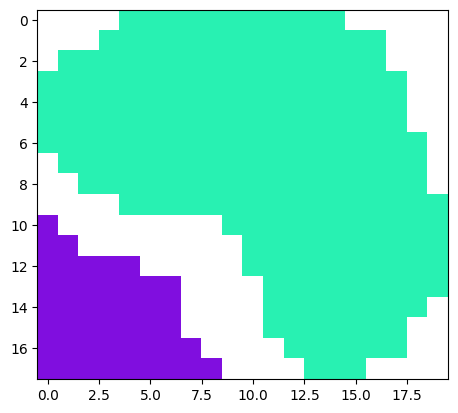

รูปที่ 2
ขนาด 100


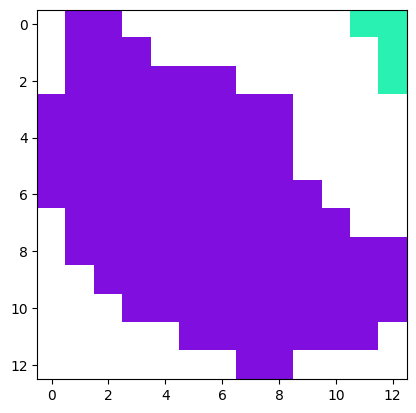

รูปที่ 3
ขนาด 57


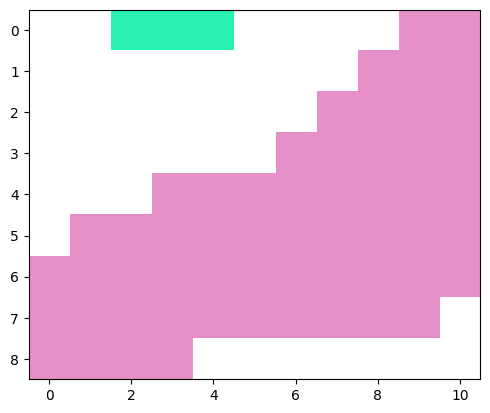

In [7]:
# print(object_list[0]['Y_min'] , object_list[0]['X_min'] , object_list[0]['Y_max']  , object_list[0]['X_max'])
# crop1 = imgcopy[object_list[0]['X_min']:object_list[0]['X_max']+1, object_list[0]['Y_min']:object_list[0]['Y_max']+1]
# plt.imshow(crop1)
# plt.show()

# crop2 = imgcopy[object_list[1]['X_min']:object_list[1]['X_max']+1, object_list[1]['Y_min']:object_list[1]['Y_max']+1]
# plt.imshow(crop2)
# plt.show()

# crop3 = imgcopy[object_list[2]['X_min']:object_list[2]['X_max']+1, object_list[2]['Y_min']:object_list[2]['Y_max']+1]
# plt.imshow(crop3)
# plt.show()

def print_crop(num):
    for i in range(num):
        print(f"รูปที่ {i+1}")
        print(f"ขนาด {object_list[i]['Size']}")
        crop = imgcopy[object_list[i]['X_min']:object_list[i]['X_max']+1 , object_list[i]['Y_min']:object_list[i]['Y_max']+1]
        plt.imshow(crop)
        plt.show()

print_crop(3)

จำนวนวัตถุ = 4
[{'Size': 229, 'X_min': 4, 'X_max': 21, 'Y_min': 8, 'Y_max': 27, 'Color': [30, 130, 76]}, {'Size': 100, 'X_min': 14, 'X_max': 26, 'Y_min': 6, 'Y_max': 18, 'Color': [131, 115, 46]}, {'Size': 57, 'X_min': 21, 'X_max': 29, 'Y_min': 19, 'Y_max': 29, 'Color': [49, 248, 226]}, {'Size': 54, 'X_min': 1, 'X_max': 11, 'Y_min': 2, 'Y_max': 9, 'Color': [103, 168, 114]}]
Max 3 area object No.1 = 229 No.3 = 100 No.3 = 57
รูปที่ 1
ขนาด 229


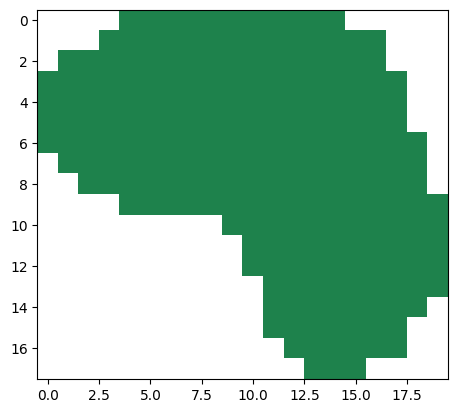

รูปที่ 2
ขนาด 100


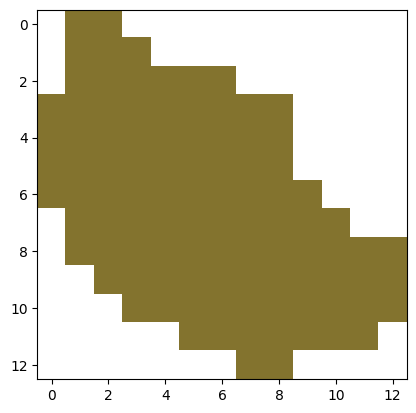

รูปที่ 3
ขนาด 57


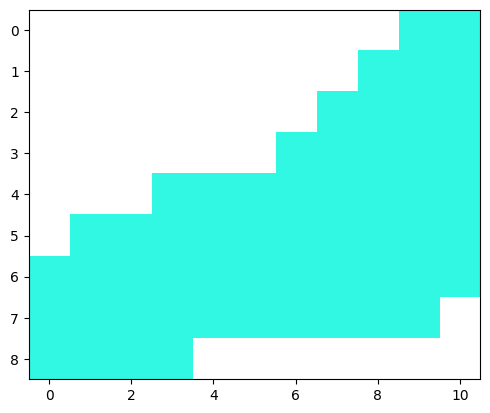

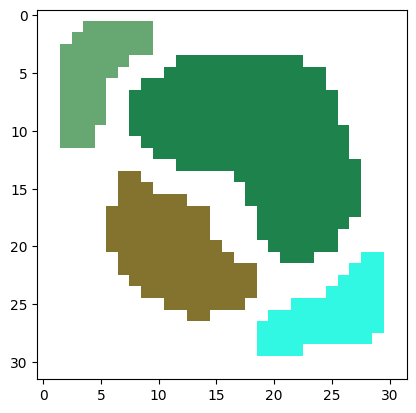

In [8]:
def print_crop(num):
    for x in range(num):
        print(f"รูปที่ {x+1}")
        print(f"ขนาด {object_list[x]['Size']}")
        r = object_list[x]['Color'][0]
        g = object_list[x]['Color'][1]
        b = object_list[x]['Color'][2]
        crop = imgcopy[object_list[x]['X_min']:object_list[x]['X_max']+1 , object_list[x]['Y_min']:object_list[x]['Y_max']+1]
        copy = crop.copy()
        h = copy.shape[0]
        w = copy.shape[1]
        for i in range(h):
            for j in range(w):
                if copy[i][j][0] != r and copy[i][j][1] != g and copy[i][j][2] != b :
                    copy[i][j][0] = copy[i][j][1] = copy[i][j][2] = 255
        plt.imshow(copy)
        plt.show()



def labeling_findmax(img,numCrop):
    def recursive(x, y, color,xmin,xmax,ymin,ymax,size): 
        if 0 <= x < len(img) and 0 <= y < len(img[0]) and img[x][y][0] == 0: 
            if x <= xmin:
                xmin = x
            if x >= xmax:
                xmax = x
            if y <= ymin:
                ymin = y
            if y >= ymax:
                ymax = y
            size = size + 1
            img[x][y][0] = color[0]
            img[x][y][1] = color[1]
            img[x][y][2] = color[2]
            xmin, xmax, ymin, ymax, size = recursive(x + 1, y, color, xmin, xmax, ymin, ymax, size)  # ขวา 
            xmin, xmax, ymin, ymax, size = recursive(x - 1, y, color, xmin, xmax, ymin, ymax, size)  # ซ้าย
            xmin, xmax, ymin, ymax, size = recursive(x, y + 1, color, xmin, xmax, ymin, ymax, size)  # บน
            xmin, xmax, ymin, ymax, size = recursive(x, y - 1, color, xmin, xmax, ymin, ymax, size)  # ล่าง
        return xmin,xmax,ymin,ymax,size
            
    
    h = img.shape[0]
    w = img.shape[1]
    counting = 0
    xmax  = ymax = size = 0
    xmin = h
    ymin = w
    for i in range(h):
        for j in range(w):
            if img[i][j][0] != 0 and img[i][j][0] != 255:
                    xmax  = ymax = size = 0
                    xmin = h
                    ymin = w
            if img[i][j][0] == 0 and img[i][j][1] == 0 and img[i][j][2] == 0:
                r = int(np.random.uniform(1,255))
                g = int(np.random.uniform(1,255))
                b = int(np.random.uniform(1,255))
                color = [r,g,b]
                xmin,xmax,ymin,ymax,size = recursive(i, j,color,xmin,xmax,ymin,ymax,size)
                counting = counting + 1
                object_list.append({
                    'Size': size,
                    'X_min': xmin,
                    'X_max': xmax,
                    'Y_min': ymin,
                    'Y_max': ymax,
                    'Color': color
                })
                # print(f"size = {size} xmin = {xmin} xmax = {xmax} ymin = {ymin} ymax = {ymax}")
    
    print(f"จำนวนวัตถุ = {counting}")
    

org = cv2.imread('image/11.png') 
org = THRESHOLD(org)
imgcopy = org.copy()
sys.setrecursionlimit(70000)
counting = 0
size = 0
check = 0
xmin = xmax = ymin = ymax = 0
object_list = []
numCrop = 3
labeling_findmax(imgcopy,numCrop)

def myFunc(e):
  return e['Size']

# print(object_list)
object_list.sort(reverse=True,key=myFunc)
print(object_list)
try:
    print(f"Max 3 area object No.1 = {object_list[0]['Size']} No.2 = {object_list[1]['Size']} No.3 = {object_list[2]['Size']}")
except:
    print('out of range')
print_crop(numCrop)
plt.imshow(imgcopy)
plt.show()

Opening with 3 size of mask AND Closing with 3 size of mask

[[1 1 1]
 [1 1 1]
 [1 1 1]]
3


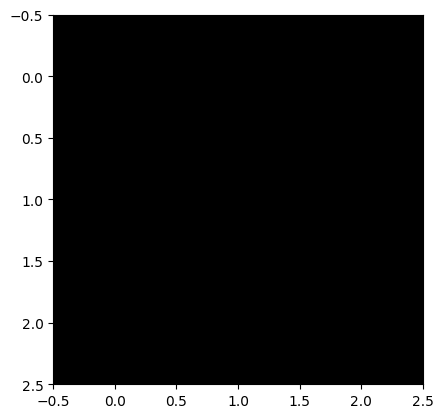

In [9]:
element = np.array([[1,1,1],
                    [1,1,1],
                    [1,1,1]])
print(element)
print(len(element[0]))
plt.imshow(element, cmap='gray')

[[1 1 1]
 [1 1 1]
 [1 1 1]]


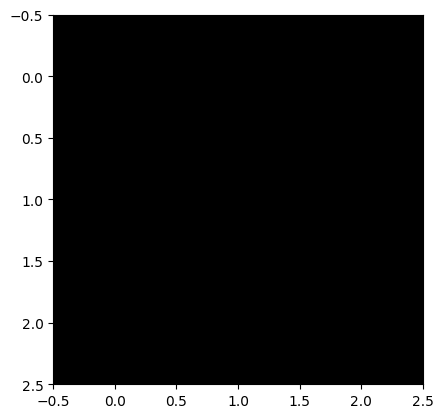

In [10]:
size=3
mask3x3= np.ones((size,size), dtype=np.uint8)
print(mask3x3)
constant= (size-1)//2
plt.imshow(mask3x3, cmap='gray')

In [11]:
def Erosion(img, mask):
    h = img.shape[0]
    w = img.shape[1]
    imgErode= np.zeros((h,w), dtype=np.uint8)

    h_mask = len(mask[0])
    w_mask = len(mask[1])
    constant_H = (h_mask - 1) // 2
    constant_W = (w_mask - 1) // 2
    for i in range(constant_H, h-constant_H):
        for j in range(constant_W,w-constant_W):
            temp= img[i-constant_H:i+constant_H+1, j-constant_W:j+constant_W+1]
            product= temp*mask
            # print(product)
            imgErode[i,j]= np.min(product)

    return imgErode

def Dilation(img, mask):
    h = img.shape[0]
    w = img.shape[1]
    imgDilate= np.zeros((h,w), dtype=np.uint8)
    h_mask = len(mask[0])
    w_mask = len(mask[1])
    constant_H = (h_mask - 1) // 2
    constant_W = (w_mask - 1) // 2
    for i in range(constant_H, h-constant_H):
        for j in range(constant_W,w-constant_W):
            temp= img[i-constant_H:i+constant_H+1, j-constant_W:j+constant_W+1]
            product= temp*mask
            imgDilate[i,j]= np.max(product)
    
    return imgDilate

def Opening(img, mask):
    img = Erosion(img, mask)
    img = Dilation(img, mask)
    return img

def Closing(img, mask):
    img = Dilation(img, mask)
    img = Erosion(img, mask)
    return img

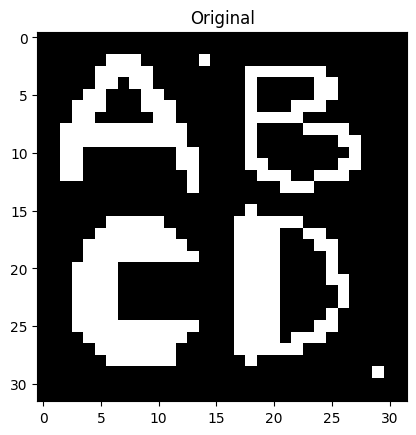

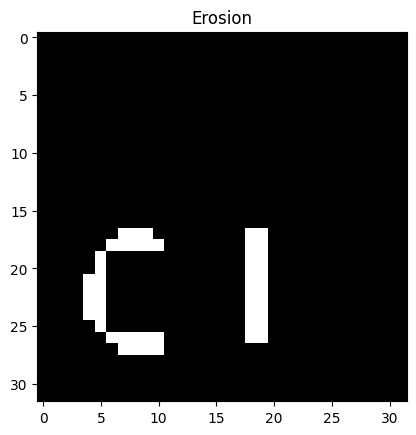

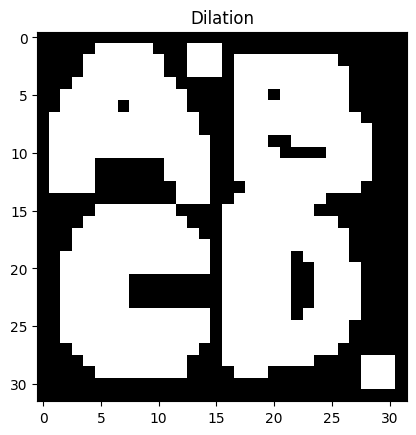

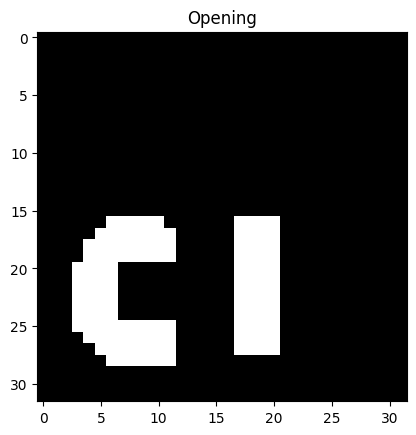

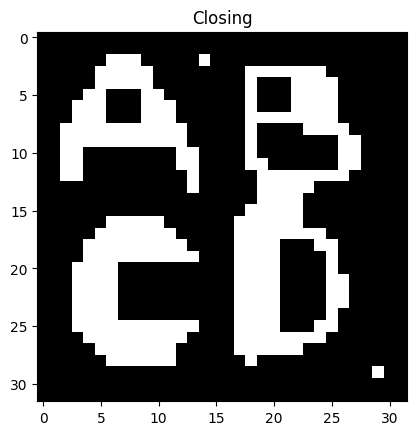

In [12]:
img = cv2.imread("image/08.png",0) #ภาพBGR
test_erosion = Erosion(img, mask3x3)
test_dilation = Dilation(img, mask3x3)
test_opening = Opening(img, mask3x3)
test_closing = Closing(img, mask3x3)
plt.imshow(img, cmap= 'gray')
plt.title("Original")
plt.show()
plt.imshow(test_erosion, cmap= 'gray')
plt.title("Erosion")
plt.show()
plt.imshow(test_dilation, cmap= 'gray')
plt.title("Dilation")
plt.show()
plt.imshow(test_opening, cmap= 'gray')
plt.title("Opening")
plt.show()
plt.imshow(test_closing, cmap= 'gray')
plt.title("Closing")
plt.show()

Opening and closing with 2 shape of mask / rectangle / circle

In [61]:
rectangle=np.array([[0,0,0,0,0],
                    [255,255,255,255,255],
                    [255,255,255,255,255],
                    [255,255,255,255,255],
                    [0,0,0,0,0]], dtype=np.uint8)
print(rectangle)
print(" ")
circle  = np.array([[0,0,255,0,0],
                    [0,255,255,255,0],
                    [255,255,255,255,255],
                    [0,255,255,255,0],
                    [0,0,255,0,0]], dtype=np.uint8)
print(circle)


def ErosionV2(img, mask):
    imH = img.shape[0]
    imW = img.shape[1]
    filterH = mask.shape[0]
    filterW = mask.shape[1]
    filterHCenter = int((filterH+1)/2)-1
    filterWCenter = int((filterW+1)/2)-1

    sumWeightMask = 0
    for i in range(filterH):
        for j in range(filterW):
            sumWeightMask = sumWeightMask + mask[i][j]

    imgOut = np.full((imH,imW,3),0,dtype=np.uint16)
    for i in range(imH):
        for j in range(imW):
            imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = 255
            for fi in range(filterH):
                for fj in range(filterW):
                    posX = i + (fi-filterHCenter)
                    posY = j + (fj-filterWCenter)
                    if posX < 0 :
                        posX = 0
                    elif posX >= imH :
                        posX = imH - 1
                    if posY <0:
                        posY = 0
                    elif posY >= imW :
                        posY = imW - 1 

                    if mask[fi][fj] == 255 and img[posX][posY][0] != 255:
                        imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = 0
                        break
    return imgOut
def DilationV2(img, mask):
    imH = img.shape[0]
    imW = img.shape[1]
    filterH = mask.shape[0]
    filterW = mask.shape[1]
    filterHCenter = int((filterH+1)/2)-1
    filterWCenter = int((filterW+1)/2)-1

    sumWeightMask = 0
    for i in range(filterH):
        for j in range(filterW):
            sumWeightMask = sumWeightMask + mask[i][j]

    imgOut = np.full((imH,imW,3),0,dtype=np.uint16)
    for i in range(imH):
        for j in range(imW):
            for fi in range(filterH):
                for fj in range(filterW):
                    posX = i + (fi-filterHCenter)
                    posY = j + (fj-filterWCenter)
                    if posX < 0 :
                        posX = 0
                    elif posX >= imH :
                        posX = imH - 1
                    if posY <0:
                        posY = 0
                    elif posY >= imW :
                        posY = imW - 1 

                    if mask[fi][fj] == 255 and img[posX][posY][0] == 255:
                        imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = 255
                        break
    return imgOut

def OpeningV2(img, mask):
    img = ErosionV2(img, mask)
    img = DilationV2(img, mask)
    return img

def ClosingV2(img, mask):
    img = DilationV2(img, mask)
    img = ErosionV2(img, mask)
    return img

[[  0   0   0   0   0]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [  0   0   0   0   0]]
 
[[  0   0 255   0   0]
 [  0 255 255 255   0]
 [255 255 255 255 255]
 [  0 255 255 255   0]
 [  0   0 255   0   0]]


[[255 255 255]
 [255 255 255]
 [255 255 255]]


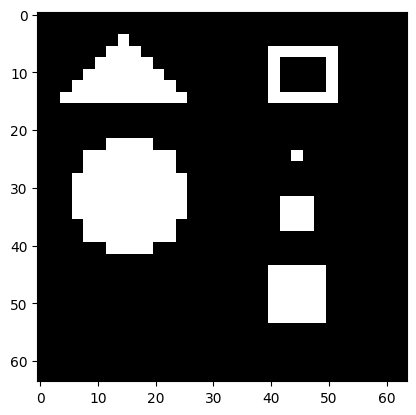

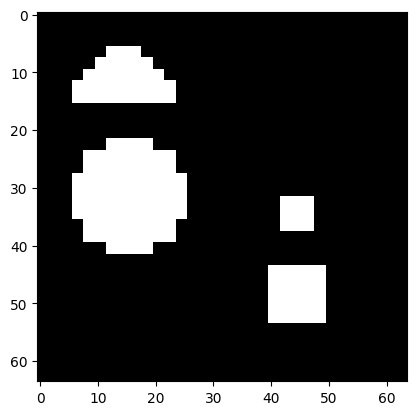

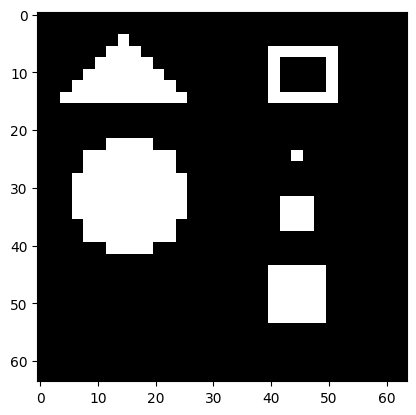

In [62]:
img_bgr = cv2.imread("image/10.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# imgGray = Grayscale(img_rgb)
size = 3
mask = np.full((size,size),255,dtype=np.uint16)

print(mask)


Open = OpeningV2(img_rgb, rectangle)
Close = ClosingV2(img_rgb, rectangle) 

# print(sumWeightMask)
plt.imshow(img_rgb)
plt.show()
plt.imshow(Open)
plt.show()
plt.imshow(Close)
plt.show()

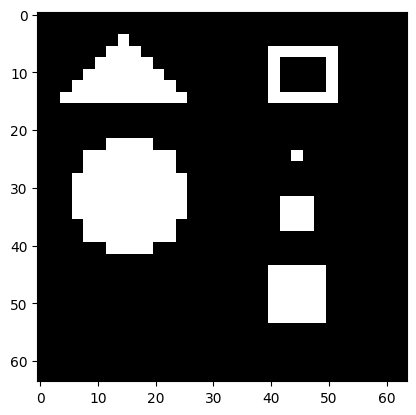

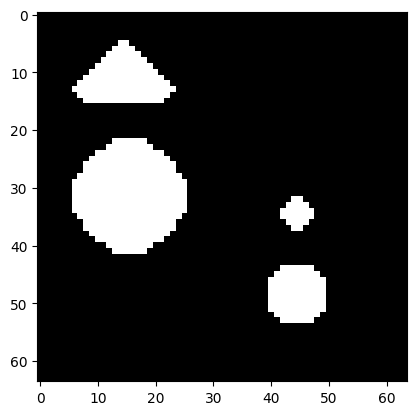

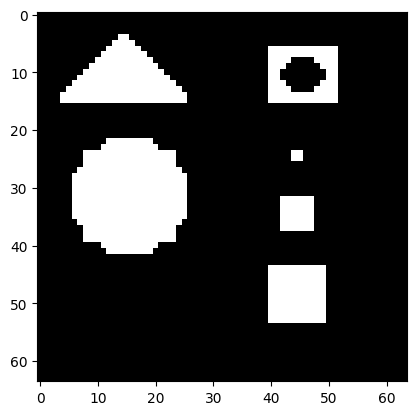

In [67]:
img_bgr = cv2.imread("image/10.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# imgGray = Grayscale(img_rgb)
size = 3
mask = np.full((size,size),255,dtype=np.uint16)




Open = OpeningV2(img_rgb, circle)
Close = ClosingV2(img_rgb, circle) 

# print(sumWeightMask)
plt.imshow(img_rgb)
plt.show()
plt.imshow(Open)
plt.show()
plt.imshow(Close)
plt.show()